# Praktikum 3: Neural Network untuk Regresi

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100)

# Evaluasi
print("Prediksi:", model.predict(X_test))

Epoch 1/100


c:\Users\vidoe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - loss: 0.9157
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - loss: 0.9157
Epoch 2/100
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9052
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9052
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8948Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8948
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8948
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8845
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8845
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8742
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8742
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.8640
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.8640
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8538
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8538
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/ste

## MLP Regresi dengan Dataset Boston Housing

### Konfigurasi Awal (Learning Rate = 0.001)

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vidoe\AppData\Local\Temp\ipykernel_4176\4193037561.py:13: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
c:\Users\vidoe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\vidoe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer,

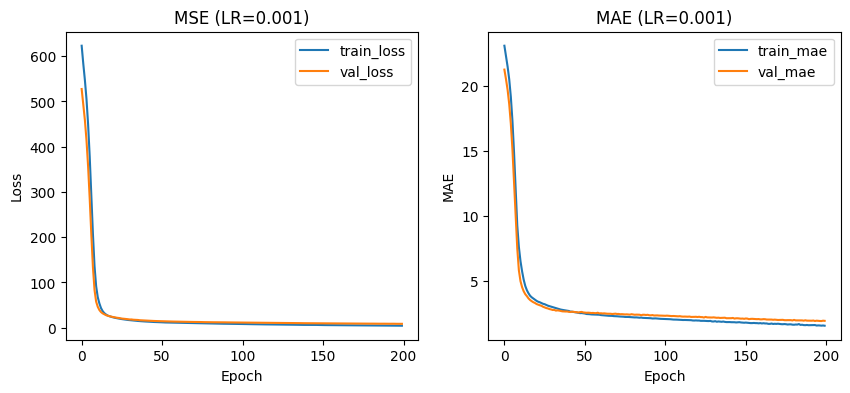

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Learning Rate 0.001 - RMSE: 2.9375
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Learning Rate 0.001 - RMSE: 2.9375


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load dataset Boston Housing
# Note: load_boston deprecated, menggunakan data dari URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target

# 2. Preprocess
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(1e-3), loss='mse', metrics=['mae'])

# 4. Train
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

# 5. Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.title('MSE (LR=0.001)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(h.history['mae'], label='train_mae')
plt.plot(h.history['val_mae'], label='val_mae')
plt.legend()
plt.title('MAE (LR=0.001)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

# Evaluasi
from sklearn.metrics import mean_squared_error
pred = model.predict(X_val)
rmse_001 = np.sqrt(mean_squared_error(y_val, pred))
print(f'Learning Rate 0.001 - RMSE: {rmse_001:.4f}')

## Tugas 4: Ubah Learning Rate dan Bandingkan Hasil

### Konfigurasi 1: Learning Rate = 0.01 (Lebih Besar)

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vidoe\AppData\Local\Temp\ipykernel_4176\2928409285.py:12: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
c:\Users\vidoe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\vidoe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer,

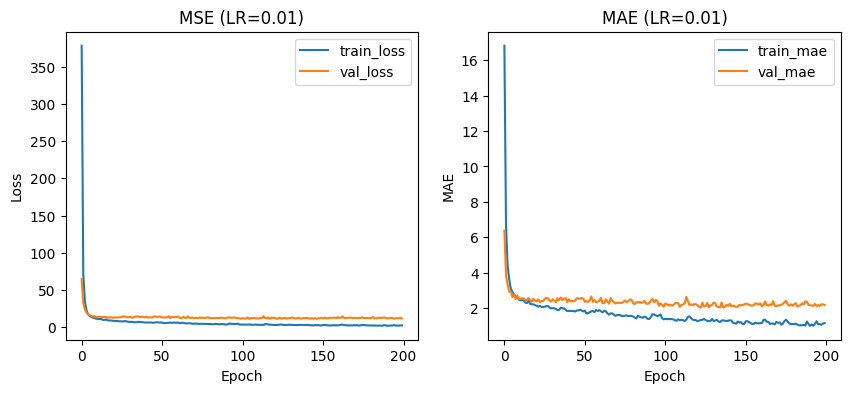

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/stepWARNING:tensorflow:5 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001EF56C03240> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Learning Rate 0.01 - RMSE: 3.3962
Learning Rate 0.01 - RMSE: 3.3962


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load dataset Boston Housing
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target

# 2. Preprocess
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(1e-2), loss='mse', metrics=['mae'])  # LR = 0.01

# 4. Train
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

# 5. Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.title('MSE (LR=0.01)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(h.history['mae'], label='train_mae')
plt.plot(h.history['val_mae'], label='val_mae')
plt.legend()
plt.title('MAE (LR=0.01)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

# Evaluasi
from sklearn.metrics import mean_squared_error
pred = model.predict(X_val)
rmse_01 = np.sqrt(mean_squared_error(y_val, pred))
print(f'Learning Rate 0.01 - RMSE: {rmse_01:.4f}')

### Konfigurasi 2: Learning Rate = 0.0001 (Lebih Kecil)

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vidoe\AppData\Local\Temp\ipykernel_4176\4019864891.py:12: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
c:\Users\vidoe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\vidoe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer,

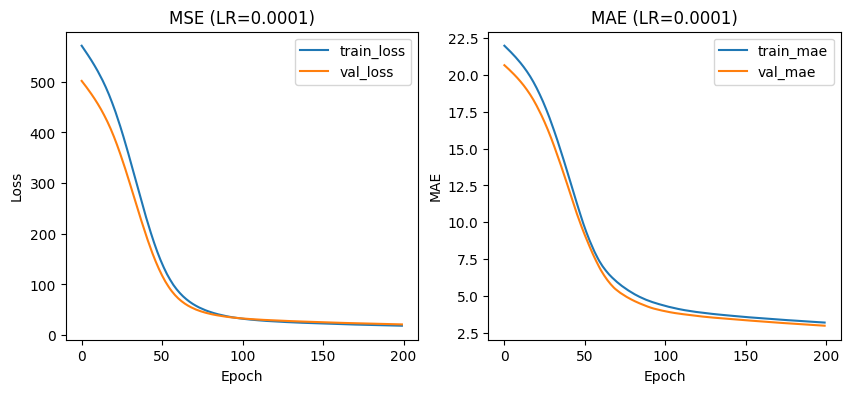

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Learning Rate 0.0001 - RMSE: 4.5798
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Learning Rate 0.0001 - RMSE: 4.5798


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load dataset Boston Housing
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target

# 2. Preprocess
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(1e-4), loss='mse', metrics=['mae'])  # LR = 0.0001

# 4. Train
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

# 5. Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.title('MSE (LR=0.0001)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(h.history['mae'], label='train_mae')
plt.plot(h.history['val_mae'], label='val_mae')
plt.legend()
plt.title('MAE (LR=0.0001)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

# Evaluasi
from sklearn.metrics import mean_squared_error
pred = model.predict(X_val)
rmse_0001 = np.sqrt(mean_squared_error(y_val, pred))
print(f'Learning Rate 0.0001 - RMSE: {rmse_0001:.4f}')

## Rangkuman Hasil Perbandingan Learning Rate

Jalankan semua sel di atas untuk mendapatkan perbandingan lengkap.

### Analisis Learning Rate:

**Learning Rate 0.001 (Baseline):**
- Learning rate standar yang sering digunakan
- Balance antara kecepatan konvergensi dan stabilitas

**Learning Rate 0.01 (Lebih Besar):**
- Training lebih cepat (konvergensi lebih cepat)
- Risiko: Bisa melewati minimum global (overshooting)
- Loss mungkin lebih fluktuatif

**Learning Rate 0.0001 (Lebih Kecil):**
- Training lebih lambat dan stabil
- Konvergensi lebih halus
- Risiko: Butuh lebih banyak epoch untuk mencapai hasil optimal
- Bisa terjebak di local minimum